### LCR

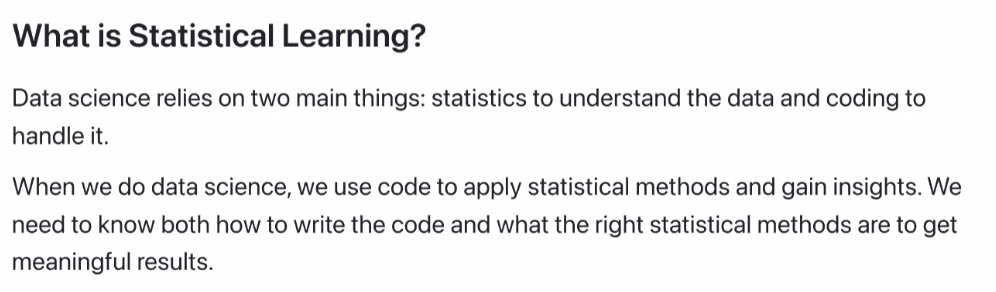

Response variable, how does it respond to another element;

Will always have some error; not all data points will be linear;

Not every stas model will perfecctly fit

# Prediction vs Inference

Prediction: we want to predict future data points; we try to reduce those errors we can control
Inference: understand the why behind the #; understand the relationship between the data; is it simple or complex

# Applying Stats Learning

Training data: used to teach the model, how to estimate the relationship

Testing data: used to see how accurate the modl is when predicting new data

# Teaching the model:

Supervised learning: We prdict something 

Unsupervised learning: this is when we try to understand the relationships between different pieces of info without predicting anything;
There is no response variable to predict, instead, the goal is to understand the relationship between variables or observations
EX: Clustering

# Regression vs Classiciation Problems:

Regression: we predict # values

Classification: We predict categories

Types of Plots:

Scatter Plots
Histograms


# Classification

Identify when to use a classifier for predictions
use a training dataset
implment k-nearnest neighbours with scikit-learn
preprocess data using scikit-learn

# Classification Problem

Focus non numerical data

Types:
Binary; involves two classes

multclass classification: more than 2 categories

Classifier assigns a class to new observations based on their similarity to known observations

classifier would use this data to learn to classify the data

# K-nearest neighbours (KNN)

KNN: finds the neaeest or most similar observiatons

closest can be measured by calculating the straight-line between points

K : is a predfined # of neighbours considered for classication 

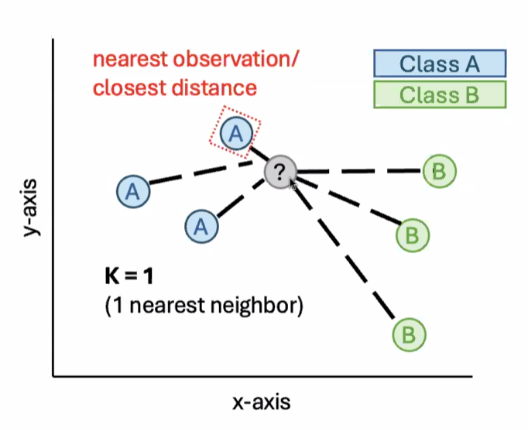

Step 1: Find the neast observation to the new observation from the training set

Step 2: identify the k observations that closest

Step 3: classify the new observations on majority vote; or most common class among neighbours

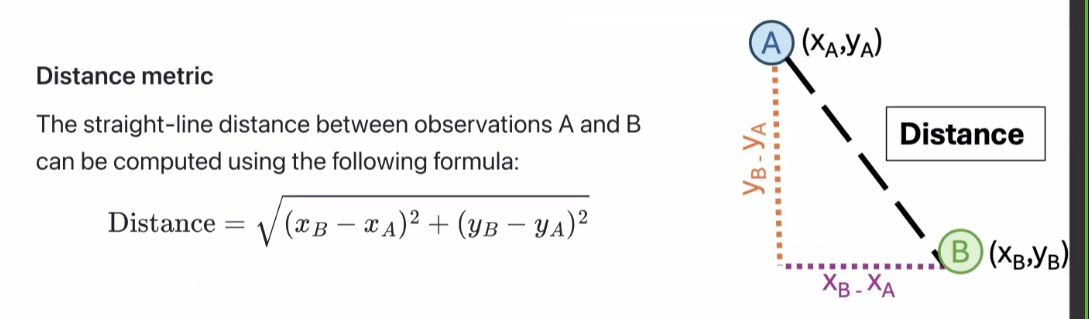

Euclidian distance is fancy way of saying using, Pythagoras's theroem

K = 1 can be sensitve to noise;

Meaning it can be more suspectible to other data; and we could mis-classify it;

To improve the prediction we can use more neighbours

K NNN: the scale of each variable affects predictions

Variables with largers scales have a bigger impact on distance calculations than variables with smaller scales

This means variables with large scales might dominate the prediction process

# Variable Standardization

To ensure fair contribution from all variables, we often scale and center data before entering it into the model:

Find the mean and standard deviation of each variable 

The standardization process adjusts the data so each variable has a mean of 0 and standard devation of 1

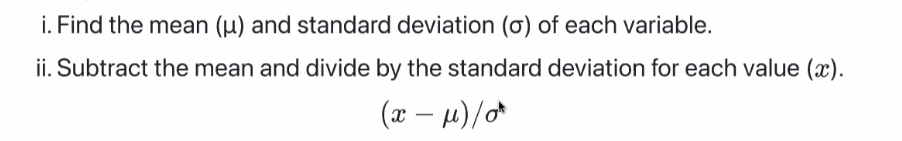

# Class imbalance

Occurs when one label is much more common than another in a dataset

Classifiers like KNN use nearby points' labels to predict the new data point's label

If it is too common, it is more common to predict that label, even if the pattern suggests otherwise


Q: what would you consider an unbalanced data set

A: General role of thumb is like 10-20%

# Missing Data

Handling missing data is more difficult and relies on expert knowledge about the data, setting, and collection methods

Missing data may relate to other variable values

ignoring missing data can cause misleading analysis

KNN requires access to all variables for observations in training data



Methods to handling missing data:

remove observations

impute missing data / fill it in with estimates

EX: Missing or null data


Assumes data is data; depending on amount and nature of data


Q:
Hi quick question on missing data, does it refer to missing features or missing labels? If it's missing labels, how do we impute with mean value?

A:
missing features, not labels!
the training data needs to have complete labels, you would not impute the labels; unknown labels is what the classifier is trying to predict!



# Having more than 2 variables

The same KNN Algorithm applies when you have a higher # of variables
Each predictor variable gives us new info to create our classifier


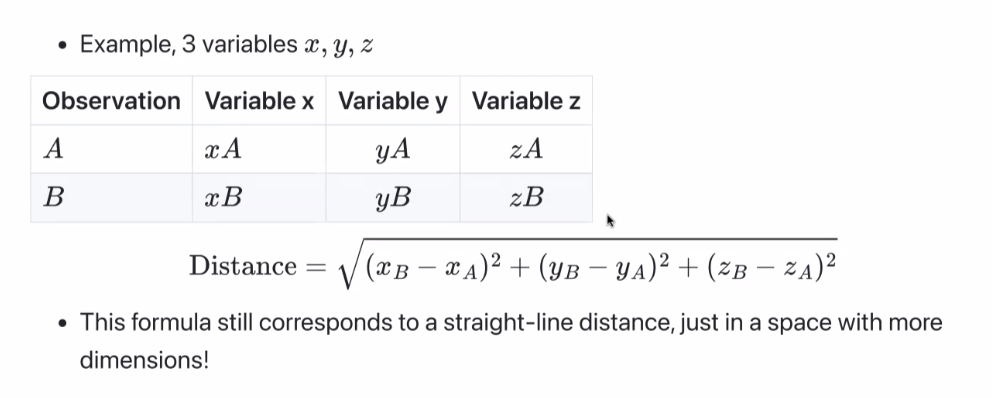

# Live Coding

In [88]:
import pandas as pd

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

from mpl_toolkits import mplot3d

In [89]:
cancer = pd.read_csv(r'..\notebooks\dataset\wdbc.csv')
cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [90]:
cancer.info()

# tells us about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [91]:
cancer['diagnosis'].unique()

# here we have a binary classification of data
# unique values


array(['M', 'B'], dtype=object)

In [92]:
# cleaning the data

# use replace method

cancer['diagnosis'] = cancer['diagnosis'].replace({
    "M": "Maligant",
    "B": "Benign"
})

In [93]:
cancer["diagnosis"].unique()

array(['Maligant', 'Benign'], dtype=object)

In [94]:
cancer['diagnosis'].value_counts()

diagnosis
Benign      357
Maligant    212
Name: count, dtype: int64

In [95]:
# to find the % 
cancer['diagnosis'].value_counts(normalize = True)

diagnosis
Benign      0.627417
Maligant    0.372583
Name: proportion, dtype: float64

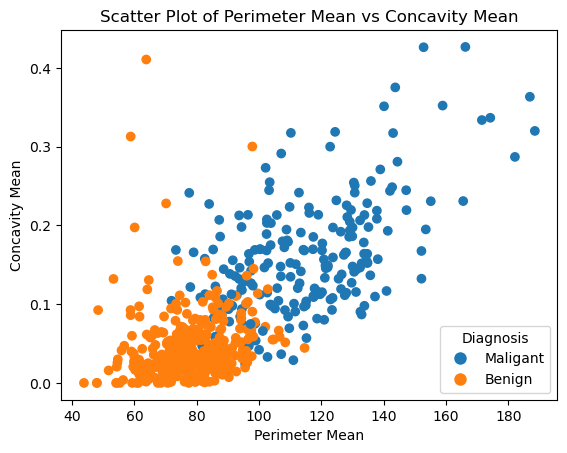

In [96]:
# Create mapping between values and colors > Plotting the data

labels = cancer["diagnosis"].unique().tolist()

colors = list(mcolors.TABLEAU_COLORS.keys())

color_map = {l: colors[i % len(colors)] for i, l in enumerate(labels)}

 

# Plot

plt.scatter(cancer["perimeter_mean"], cancer['concavity_mean'], 

            color=cancer["diagnosis"].map(color_map))

 

# Create custom legend handles

handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,

                      markersize=10, markerfacecolor=color_map[label])

           for label in labels]

 

# Add labels and legend

plt.xlabel('Perimeter Mean')

plt.ylabel('Concavity Mean')

plt.title('Scatter Plot of Perimeter Mean vs Concavity Mean')

plt.legend(handles=handles, title='Diagnosis')

plt.show()

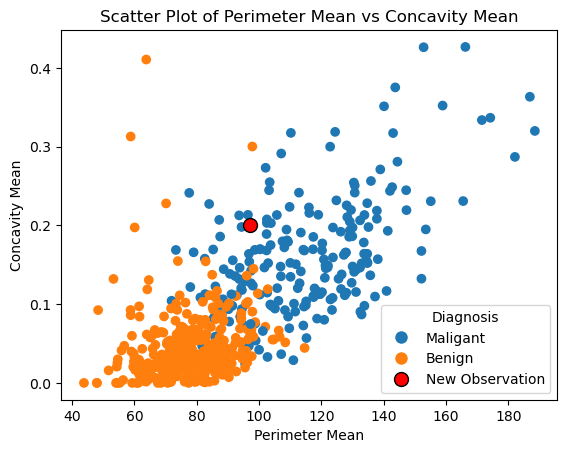

In [97]:
# Plot existing data

plt.scatter(cancer["perimeter_mean"], cancer['concavity_mean'], 

            color=cancer["diagnosis"].map(color_map))

 

# Create custom legend handles

handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,

                      markersize=10, markerfacecolor=color_map[label])

           for label in labels]

 

# Add new observation

new_observation = {'perimeter_mean': 97, 'concavity_mean': 0.20}

plt.scatter(new_observation['perimeter_mean'], new_observation['concavity_mean'],

            color='red', edgecolor='black', s=100, label='New Observation')

# Add labels and legend

plt.xlabel('Perimeter Mean')

plt.ylabel('Concavity Mean')

plt.title('Scatter Plot of Perimeter Mean vs Concavity Mean')

plt.legend(handles=handles + [plt.Line2D([0], [0], marker='o', color='w', 

                                          markerfacecolor='red', markeredgecolor='black', 

                                          markersize=10, label='New Observation')], 

           title='Diagnosis')

plt.show()

The diagram is "lying" because on the x axis the red to orange is small, so it makes it seem to be close without standardize
Or it is similar to an optical illusion; The x axis wise the red and orange point are close or do not change much; but on the y axis they are far away


standardize > look at mean of 1 point > so the avg will be 0 ; and std dev = 1; 

look at individual columns ;

- K > a value we are choosing 

In [98]:
# New observations

# on a data level the red point is surrounded by maligant;
# but more weight was put on the perimeter mean making the closest benign

new_obs_Permimeter = 97
new_obs_Concavity = 0.2

In [99]:
# measuring the  KNN to predict the diagnosis

# following the formula > A^ + B^2 = C^2

cancer['dist_from_new'] = (

(cancer['perimeter_mean'] - new_obs_Permimeter )**2 +

(cancer['concavity_mean'] - new_obs_Concavity)**2

)**(1/2)

In [100]:
# assuming K = 5

# Using Pandas to find the 5 smallest distances ; then only return certain columns

nearest_5 = cancer.nsmallest(5, "dist_from_new")[[

    "perimeter_mean",

    "concavity_mean",

    "diagnosis",

    "dist_from_new"

]]

In [101]:
nearest_5

,perimeter_mean,concavity_mean,diagnosis,dist_from_new
291,97.03,0.05940,Benign,0.143765
138,96.85,0.15390,Maligant,0.156924
15,96.73,0.16390,Maligant,0.272403
514,97.26,0.07486,Maligant,0.288548
54,97.26,0.05253,Maligant,0.298910


In [102]:
# classify new observations with extra features

<module 'matplotlib.pyplot' from 'c:\\Users\\User\\miniconda3\\envs\\dsi_participant\\lib\\site-packages\\matplotlib\\pyplot.py'>

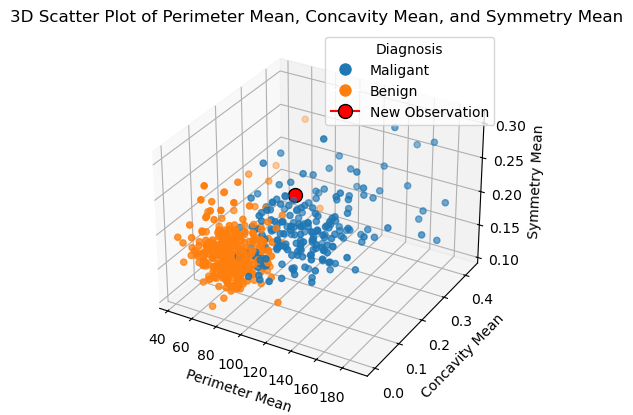

In [103]:
# 3d scatter plot

# Create mapping between values and colors

labels = cancer["diagnosis"].unique().tolist()

colors = list(mcolors.TABLEAU_COLORS.keys())

color_map = {l: colors[i % len(colors)] for i, l in enumerate(labels)}

 

# Create a 3D plot

ax = plt.axes(projection="3d")

 

# Plot data points with color corresponding to diagnosis

sc = ax.scatter3D(cancer['perimeter_mean'], cancer['concavity_mean'], cancer['symmetry_mean'], 

                  c=cancer['diagnosis'].map(color_map), marker='o')

 

# Define the new observation

new_observation = {'perimeter_mean': 97, 'concavity_mean': 0.20, 'symmetry_mean': 0.22}

 

# Plot the new observation

ax.scatter3D(new_observation['perimeter_mean'], new_observation['concavity_mean'], 

             new_observation['symmetry_mean'], color='red', edgecolor='black', 

             s=100, marker='o', label='New Observation')

# Add axis labels

ax.set_xlabel('Perimeter Mean')

ax.set_ylabel('Concavity Mean')

ax.set_zlabel('Symmetry Mean')

ax.set_title('3D Scatter Plot of Perimeter Mean, Concavity Mean, and Symmetry Mean')

 

# Create custom legend handles

handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,

                      markersize=10, markerfacecolor=color_map[label])

           for label in labels]

 

# Add custom legend for new observation

handles.append(plt.Line2D([0], [0], marker='o', color='red', label='New Observation', 

                          markersize=10, markeredgecolor='black'))

 

# Add legend

plt.legend(handles=handles, title='Diagnosis')

 

# Show plot

plt

In [104]:
# new observation

new_obs_Permimeter = 97
new_obs_Concavity = 0.2
new_obs_Symmetry = 0.22

In [105]:
# manually coding the math

#then squaring them

cancer["dist_from_new"] = (
# squaring to get rid of negatives
(cancer['perimeter_mean']  - new_obs_Permimeter ) **2 + 
(cancer['concavity_mean']  - new_obs_Concavity) **2 + 
(cancer['symmetry_mean'] - new_obs_Symmetry) **2 
) ** (1/2)

In [106]:
nearest_5 = cancer.nsmallest(5, "dist_from_new")[[

    "perimeter_mean",

    "concavity_mean",

    "diagnosis",

    "dist_from_new"

]]

In [107]:
nearest_5

# we didn't standardize the variables ; meaning the perimeter mean put more weight 

,perimeter_mean,concavity_mean,diagnosis,dist_from_new
291,97.03,0.05940,Benign,0.147305
138,96.85,0.15390,Maligant,0.158795
15,96.73,0.16390,Maligant,0.272597
514,97.26,0.07486,Maligant,0.295539
54,97.26,0.05253,Maligant,0.304562


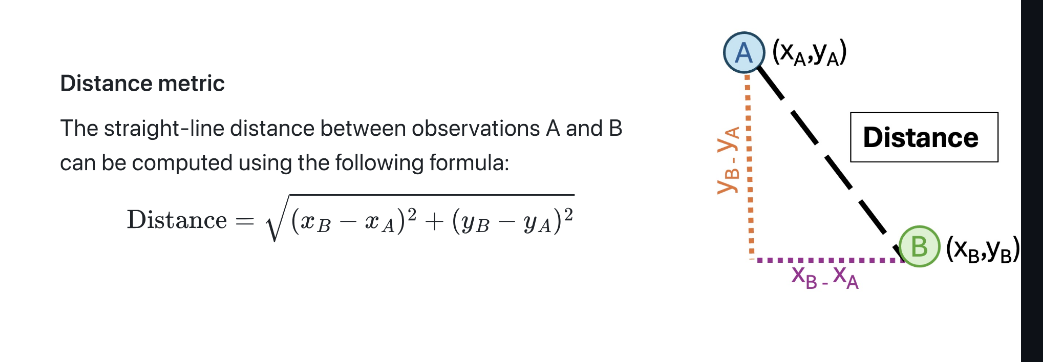

Here the data point is closest to perimeter mean in terms of 97; 

While on the concavity the other data points are further away;

so more weigh was put on perimeter, leading to a smaller distance from a benign; 

So we did not standardize the data

# sci-kit learn


In [54]:
# sci-kit learn + pandas dataframe

# have to config it though

from sklearn import set_config 
set_config ( transform_output = "pandas")


In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
cancer_train = cancer[["diagnosis", "perimeter_mean", "concavity_mean"]]

cancer_train

,diagnosis,perimeter_mean,concavity_mean
0,Maligant,122.80,0.30010
1,Maligant,132.90,0.08690
2,Maligant,130.00,0.19740
3,Maligant,77.58,0.24140
4,Maligant,135.10,0.19800
...,...,...,...
564,Maligant,142.00,0.24390
565,Maligant,131.20,0.14400
566,Maligant,108.30,0.09251
567,Maligant,140.10,0.35140


In [57]:
knn = KNeighborsClassifier(n_neighbors= 5)
knn

KNeighborsClassifier()

In [ ]:
# predictor - x, response - y

# Capitials = predicotr
X = cancer_train[["perimeter_mean","concavity_mean"]]

y = cancer_train["diagnosis"]

knn.fit(X,y)

KNeighborsClassifier()

In [64]:
# fit KNN model to data

knn.fit(X, y)

KNeighborsClassifier()

In [66]:
new_obs = pd.DataFrame({"perimeter_mean":[97],"concavity_mean":[0.20]})

new_obs



,perimeter_mean,concavity_mean
0,97,0.2


In [67]:
knn.predict(new_obs)

array(['Maligant'], dtype=object)

In [ ]:
# Saving data via Pandas

# cancer.to_csv('cancer.csv', index=False)

Can we get some recommendations for books or websites where we can learn more about the theoretical aspect of today’s session?

Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, covers all of Scikit Learn. 
 

The Scikit Learn Documentation is also one of the best!

Normalization vs standardization
standardization: taking domain space so that each variable; make all the numbers in the same scale; transform x values;


> 

Office hours

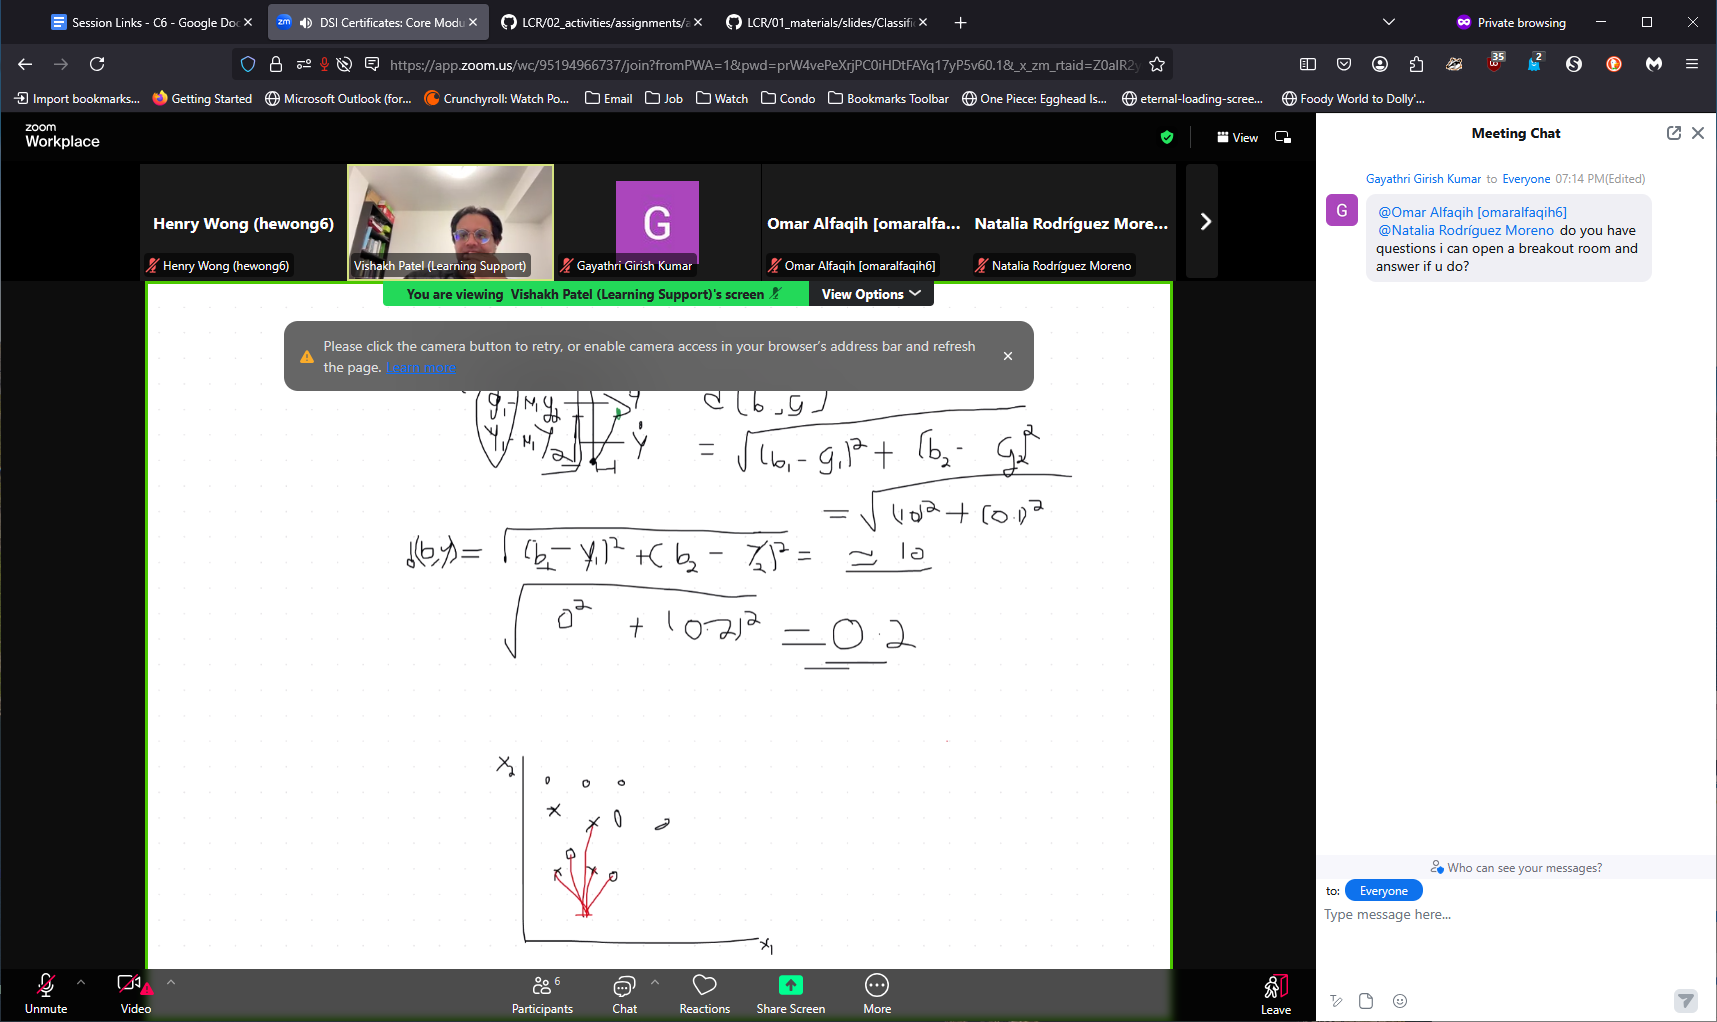

In case of ties, we tell it how to break it; 

- includes: randomly choosing; randomly assign it based on the probabilities;


> but need to manage 
> can also have an unbalanced assignment method as well (EX: need 60% of the data to be X )

> 3 blue 1 brown >> Youtube channel 

Steps: > linear algebra > Stats
> MIT > algrebra > albert ? > Gilbert strang mit lecture series on algebra

> Stanford > 

Book:  Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent

Intro to statistical learning hastie, tibshirani